# 隣接カテゴリロジットモデル（adjacent category logit model）

**隣接カテゴリロジットモデル（adjacent category logit model）** は、順序カテゴリデータに対するモデルの一種で、**隣り合うカテゴリ間**のオッズを対象にモデル化する。

累積ロジットモデルが「$k$ 以下 vs $k$ より上」という累積確率のオッズを扱うのに対し、隣接カテゴリロジットモデルは「カテゴリ $k$ vs カテゴリ $k+1$」という隣接ペアのオッズを直接モデル化する。

## モデルの定式化

### 隣接カテゴリロジット

目的変数 $y \in \{1, 2, \dots, K\}$ が $K$ カテゴリの順序変数であるとする。隣接カテゴリロジットは、隣り合うカテゴリの確率の比を対数オッズとして定義する：

$$
\log \frac{P(y = k \mid \mathbf{x})}{P(y = k+1 \mid \mathbf{x})} = \alpha_k - \mathbf{x}^\top \boldsymbol{\beta}
\quad (k = 1, \dots, K-1)
$$

ここで

- $\alpha_k$：カテゴリ $k$ に固有の切片パラメータ
- $\boldsymbol{\beta}$：全カテゴリ共通の回帰係数ベクトル

$\boldsymbol{\beta}$ が全カテゴリで共通であるという制約は、累積ロジットモデルにおける比例オッズ仮定に対応する。

:::{margin} 符号の慣習について

文献によっては $\alpha_k + \mathbf{x}^\top \boldsymbol{\beta}$ と書くものもある。ここでは累積ロジットモデルの表記と整合的に $\alpha_k - \mathbf{x}^\top \boldsymbol{\beta}$ としている。

:::

### カテゴリ確率の導出

隣接カテゴリロジットの定義から

$$
P(y = k \mid \mathbf{x}) = P(y = k+1 \mid \mathbf{x}) \cdot \exp(\alpha_k - \mathbf{x}^\top \boldsymbol{\beta})
$$

これを再帰的に適用すると、最後のカテゴリ $K$ を基準として

$$
P(y = k \mid \mathbf{x}) = P(y = K \mid \mathbf{x}) \cdot \prod_{j=k}^{K-1} \exp(\alpha_j - \mathbf{x}^\top \boldsymbol{\beta})
$$

すなわち

$$
P(y = k \mid \mathbf{x}) = P(y = K \mid \mathbf{x}) \cdot \exp\left( \sum_{j=k}^{K-1} \alpha_j - (K - k)\, \mathbf{x}^\top \boldsymbol{\beta} \right)
$$

確率の総和が1になるという制約 $\sum_{k=1}^{K} P(y = k \mid \mathbf{x}) = 1$ から

$$
P(y = k \mid \mathbf{x}) = \frac{\exp\left( \sum_{j=k}^{K-1} \alpha_j - (K-k)\, \mathbf{x}^\top \boldsymbol{\beta} \right)}{\sum_{m=1}^{K} \exp\left( \sum_{j=m}^{K-1} \alpha_j - (K-m)\, \mathbf{x}^\top \boldsymbol{\beta} \right)}
$$

ただし $k = K$ のとき $\sum_{j=K}^{K-1}(\cdot) = 0$ と約束する。

## 累積ロジットモデルとの比較

| | 累積ロジットモデル | 隣接カテゴリロジットモデル |
|---|---|---|
| ロジット | $\log \frac{P(y \le k)}{P(y > k)}$ | $\log \frac{P(y = k)}{P(y = k+1)}$ |
| 解釈 | 「$k$以下」vs「$k$より上」の累積オッズ | 「$k$」vs「$k+1$」の隣接オッズ |
| 確率の導出 | 累積確率の差 | 再帰的に計算 |
| IRTとの対応 | 段階反応モデル（GRM） | 部分採点モデル（PCM） |
| 比例オッズの意味 | 累積オッズ比が $x$ に依らず一定 | 隣接オッズ比が $x$ に依らず一定 |

隣接カテゴリロジットモデルの方が「直前のカテゴリから次のカテゴリへの移行」を直接モデル化するため、各カテゴリ間の遷移の難しさを表現する場合に直感的である。

## 係数の解釈

$\exp(\beta_j)$ は、説明変数 $x_j$ が1単位増加したときの**隣接カテゴリ間のオッズの変化倍率**である。

具体的に、$\beta_j > 0$ のとき

$$
\frac{P(y = k \mid x_j + 1)}{P(y = k+1 \mid x_j + 1)} = e^{-\beta_j} \cdot \frac{P(y = k \mid x_j)}{P(y = k+1 \mid x_j)}
$$

なので、$\beta_j > 0$ は $x_j$ が増えると「カテゴリ $k$ よりカテゴリ $k+1$ を選ぶオッズが $e^{\beta_j}$ 倍になる」、すなわち**高いカテゴリを選びやすくなる**ことを意味する。

この解釈はすべての隣接ペアで共通であり（比例オッズ仮定）、累積ロジットモデルの $\exp(\beta_j)$ が「累積オッズの変化倍率」であるのと対比される。

## 最尤推定

### 対数尤度

$n$ 個の独立な観測 $(y_i, \mathbf{x}_i)$ に対する対数尤度は

$$
\ell(\boldsymbol{\alpha}, \boldsymbol{\beta}) = \sum_{i=1}^{n} \sum_{k=1}^{K} \mathbb{1}(y_i = k)\, \log P(y_i = k \mid \mathbf{x}_i)
$$

ここで $P(y_i = k \mid \mathbf{x}_i)$ は上で導出したカテゴリ確率である。

最尤推定はニュートン・ラフソン法やその他の数値最適化アルゴリズムで行う。

## Pythonによる実装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import softmax

In [2]:
def adjacent_category_probs(X: np.ndarray, alpha: np.ndarray, beta: np.ndarray) -> np.ndarray:
    """
    隣接カテゴリロジットモデルのカテゴリ確率を計算

    Parameters
    ----------
    X : np.ndarray, shape (n, p)
        説明変数行列（切片列を含まない）
    alpha : np.ndarray, shape (K-1,)
        カテゴリ固有の切片パラメータ
    beta : np.ndarray, shape (p,)
        回帰係数

    Returns
    -------
    np.ndarray, shape (n, K)
        各カテゴリの確率
    """
    n = X.shape[0]
    K = len(alpha) + 1
    eta = X @ beta  # (n,)

    # 非正規化対数確率を計算
    # カテゴリ k の非正規化対数確率: sum_{j=k}^{K-1} alpha_j - (K-k) * eta
    log_unnorm = np.zeros((n, K))
    for k in range(K):
        if k < K - 1:
            log_unnorm[:, k] = np.sum(alpha[k:]) - (K - 1 - k) * eta
        else:
            # k = K (最後のカテゴリ): 基準 = 0
            log_unnorm[:, k] = 0.0

    # softmax で正規化
    probs = softmax(log_unnorm, axis=1)
    return probs


def adjacent_category_loglik(params: np.ndarray, X: np.ndarray, y: np.ndarray, K: int) -> float:
    """負の対数尤度"""
    n_alpha = K - 1
    alpha = params[:n_alpha]
    beta = params[n_alpha:]

    probs = adjacent_category_probs(X, alpha, beta)

    # 対数尤度
    ll = 0.0
    for i in range(len(y)):
        k = int(y[i])
        ll += np.log(probs[i, k] + 1e-15)

    return -ll


def fit_adjacent_category(X: np.ndarray, y: np.ndarray) -> dict:
    """
    隣接カテゴリロジットモデルの最尤推定

    Parameters
    ----------
    X : np.ndarray, shape (n, p)
        説明変数行列（切片列を含まない）
    y : np.ndarray, shape (n,)
        目的変数（0, 1, ..., K-1）

    Returns
    -------
    dict
        alpha, beta, se, log_likelihood, hessian_inv
    """
    K = int(y.max()) + 1
    p = X.shape[1]
    n_alpha = K - 1

    # 初期値
    params0 = np.zeros(n_alpha + p)

    result = minimize(
        adjacent_category_loglik,
        params0,
        args=(X, y, K),
        method="BFGS",
    )

    alpha_hat = result.x[:n_alpha]
    beta_hat = result.x[n_alpha:]

    # 標準誤差（ヘシアン逆行列の対角要素の平方根）
    se = np.sqrt(np.diag(result.hess_inv)) if hasattr(result, "hess_inv") else np.full(len(result.x), np.nan)

    return {
        "alpha": alpha_hat,
        "beta": beta_hat,
        "se_alpha": se[:n_alpha],
        "se_beta": se[n_alpha:],
        "log_likelihood": -result.fun,
        "converged": result.success,
    }

### シミュレーションデータでの検証

In [3]:
# シミュレーションデータの生成
rng = np.random.default_rng(42)
n = 1000
K = 4  # カテゴリ数

x1 = rng.normal(0, 1, n)
x2 = rng.normal(0, 1, n)
X_sim = np.column_stack([x1, x2])

# 真のパラメータ
alpha_true = np.array([1.5, 0.5, -0.5])  # K-1 = 3 個の切片
beta_true = np.array([0.8, -0.5])

# カテゴリ確率を計算してサンプリング
probs_true = adjacent_category_probs(X_sim, alpha_true, beta_true)
y_sim = np.array([rng.choice(K, p=probs_true[i]) for i in range(n)])

print(f"カテゴリ数: {K}")
print(f"サンプルサイズ: {n}")
print(f"カテゴリ分布: {pd.Series(y_sim).value_counts().sort_index().to_dict()}")
print(f"真のパラメータ: α = {alpha_true}, β = {beta_true}")

カテゴリ数: 4
サンプルサイズ: 1000
カテゴリ分布: {0: 569, 1: 98, 2: 79, 3: 254}
真のパラメータ: α = [ 1.5  0.5 -0.5], β = [ 0.8 -0.5]


In [4]:
# 推定
result = fit_adjacent_category(X_sim, y_sim)

print(f"収束: {result['converged']}")
print(f"対数尤度: {result['log_likelihood']:.4f}")
print()

# 真のパラメータとの比較
param_df = pd.DataFrame({
    "真の値": np.concatenate([alpha_true, beta_true]),
    "推定値": np.concatenate([result["alpha"], result["beta"]]),
    "SE": np.concatenate([result["se_alpha"], result["se_beta"]]),
}, index=[f"α{k+1}" for k in range(K-1)] + [f"β{j+1}" for j in range(X_sim.shape[1])])

param_df["z値"] = param_df["推定値"] / param_df["SE"]
param_df

収束: False
対数尤度: -828.2744



,真の値,推定値,SE,z値
α1,1.5,1.558482,0.128954,12.085565
α2,0.5,0.469868,0.087037,5.398476
α3,-0.5,-0.481678,0.116475,-4.135467
β1,0.8,0.779205,0.009803,79.484337
β2,-0.5,-0.477515,0.022273,-21.438897


### カテゴリ確率の可視化

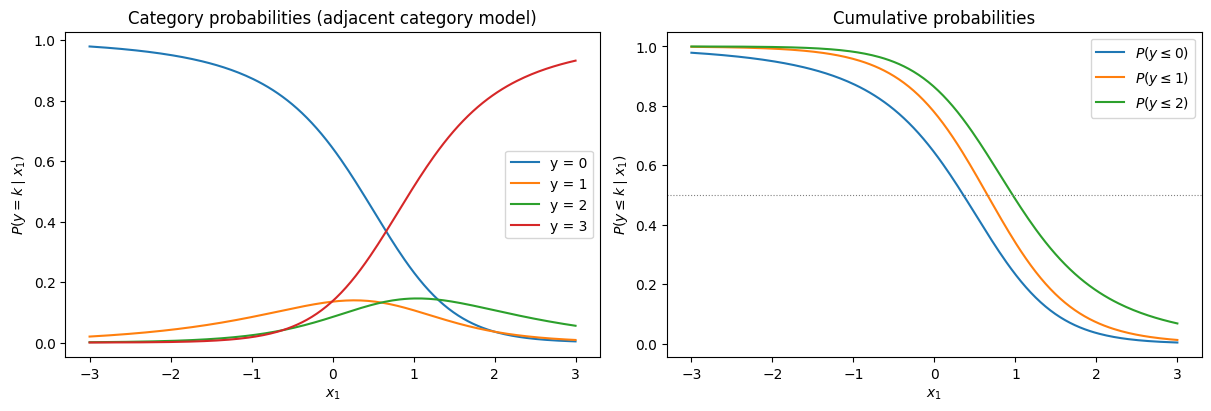

In [5]:
# x1 を変化させたときのカテゴリ確率（x2 = 0 で固定）
x1_grid = np.linspace(-3, 3, 200)
X_grid = np.column_stack([x1_grid, np.zeros_like(x1_grid)])
probs_grid = adjacent_category_probs(X_grid, result["alpha"], result["beta"])

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# カテゴリ確率曲線
labels = [f"y = {k}" for k in range(K)]
for k in range(K):
    axes[0].plot(x1_grid, probs_grid[:, k], label=labels[k])
axes[0].set(xlabel=r"$x_1$", ylabel=r"$P(y = k \mid x_1)$",
            title="Category probabilities (adjacent category model)")
axes[0].legend()

# 累積確率曲線
cum_probs = np.cumsum(probs_grid, axis=1)
for k in range(K - 1):
    axes[1].plot(x1_grid, cum_probs[:, k], label=rf"$P(y \leq {k})$")
axes[1].axhline(0.5, color="gray", linestyle=":", linewidth=0.8)
axes[1].set(xlabel=r"$x_1$", ylabel=r"$P(y \leq k \mid x_1)$",
            title="Cumulative probabilities")
axes[1].legend()

plt.show()

### 累積ロジットモデルとの比較

同じデータに対して累積ロジットモデルも推定し、カテゴリ確率曲線を比較する。

In [6]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# 累積ロジットモデル（比例オッズモデル）
df_sim = pd.DataFrame({"y": y_sim, "x1": x1, "x2": x2})
df_sim["y"] = pd.Categorical(df_sim["y"], ordered=True)

model_cum = OrderedModel(df_sim["y"], df_sim[["x1", "x2"]], distr="logit")
result_cum = model_cum.fit(method="bfgs", disp=0)
print(result_cum.summary())

                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -840.99
Model:                   OrderedModel   AIC:                             1692.
Method:            Maximum Likelihood   BIC:                             1717.
Date:                Sat, 14 Feb 2026                                         
Time:                        09:34:35                                         
No. Observations:                1000                                         
Df Residuals:                     995                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5838      0.099     16.030      0.000       1.390       1.777
x2            -1.0113      0.081    -12.473      0.0

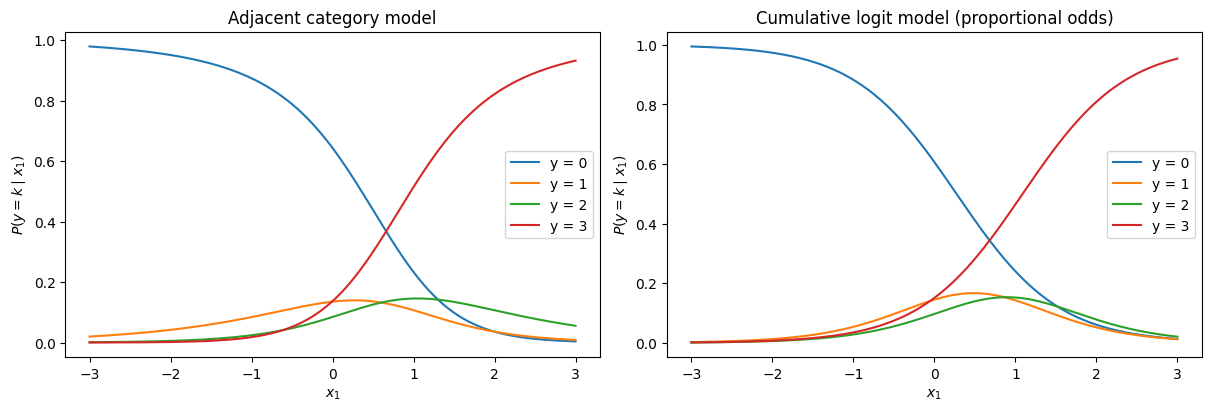

In [7]:
# 両モデルのカテゴリ確率曲線を比較
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# 隣接カテゴリロジットモデルの確率
for k in range(K):
    axes[0].plot(x1_grid, probs_grid[:, k], label=f"y = {k}")
axes[0].set(xlabel=r"$x_1$", ylabel=r"$P(y = k \mid x_1)$",
            title="Adjacent category model")
axes[0].legend()

# 累積ロジットモデルの確率
X_grid_cum = pd.DataFrame({"x1": x1_grid, "x2": np.zeros_like(x1_grid)})
probs_cum = result_cum.model.predict(result_cum.params, exog=X_grid_cum)

for k in range(K):
    axes[1].plot(x1_grid, probs_cum[:, k], label=f"y = {k}")
axes[1].set(xlabel=r"$x_1$", ylabel=r"$P(y = k \mid x_1)$",
            title="Cumulative logit model (proportional odds)")
axes[1].legend()

plt.show()

## PyMCによる実装

隣接カテゴリロジットモデルは `pm.OrderedLogistic` が累積ロジットモデルに対応するため直接は使えないが、カテゴリ確率を自前で構成して `pm.Categorical` に渡すことで実装できる。

In [8]:
import pymc as pm
import pytensor.tensor as pt
import arviz as az

with pm.Model() as acl_model:
    # 事前分布
    alpha = pm.Normal("alpha", mu=0, sigma=5, shape=K - 1)
    beta = pm.Normal("beta", mu=0, sigma=5, shape=2)

    # 線形予測子
    eta = pt.dot(X_sim, beta)  # (n,)

    # 非正規化対数確率を構成
    log_unnorm = pt.zeros((n, K))
    for k in range(K - 1):
        log_unnorm = pt.set_subtensor(
            log_unnorm[:, k],
            pt.sum(alpha[k:]) - (K - 1 - k) * eta
        )
    # k = K-1 (最後のカテゴリ) は 0 のまま

    # softmax で正規化してカテゴリ確率を得る
    probs = pm.math.softmax(log_unnorm, axis=1)

    # 尤度
    y_obs = pm.Categorical("y_obs", p=probs, observed=y_sim)

    # サンプリング
    idata = pm.sample(2000, tune=1000, random_seed=42)

Initializing NUTS using jitter+adapt_diag...
/home/mitama/notes/.venv/lib/python3.10/site-packages/pytensor/link/c/cmodule.py:2968: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


In [9]:
# 結果の表示
summary = az.summary(idata, var_names=["alpha", "beta"])

# 真の値を追加
true_vals = np.concatenate([alpha_true, beta_true])
summary["真の値"] = true_vals
summary[["mean", "sd", "hdi_3%", "hdi_97%", "真の値"]]

,mean,sd,hdi_3%,hdi_97%,真の値
alpha[0],1.562,0.114,1.349,1.779,1.5
alpha[1],0.473,0.156,0.191,0.778,0.5
alpha[2],-0.480,0.144,-0.746,-0.207,-0.5
beta[0],0.784,0.054,0.681,0.883,0.8
beta[1],-0.480,0.041,-0.556,-0.401,-0.5


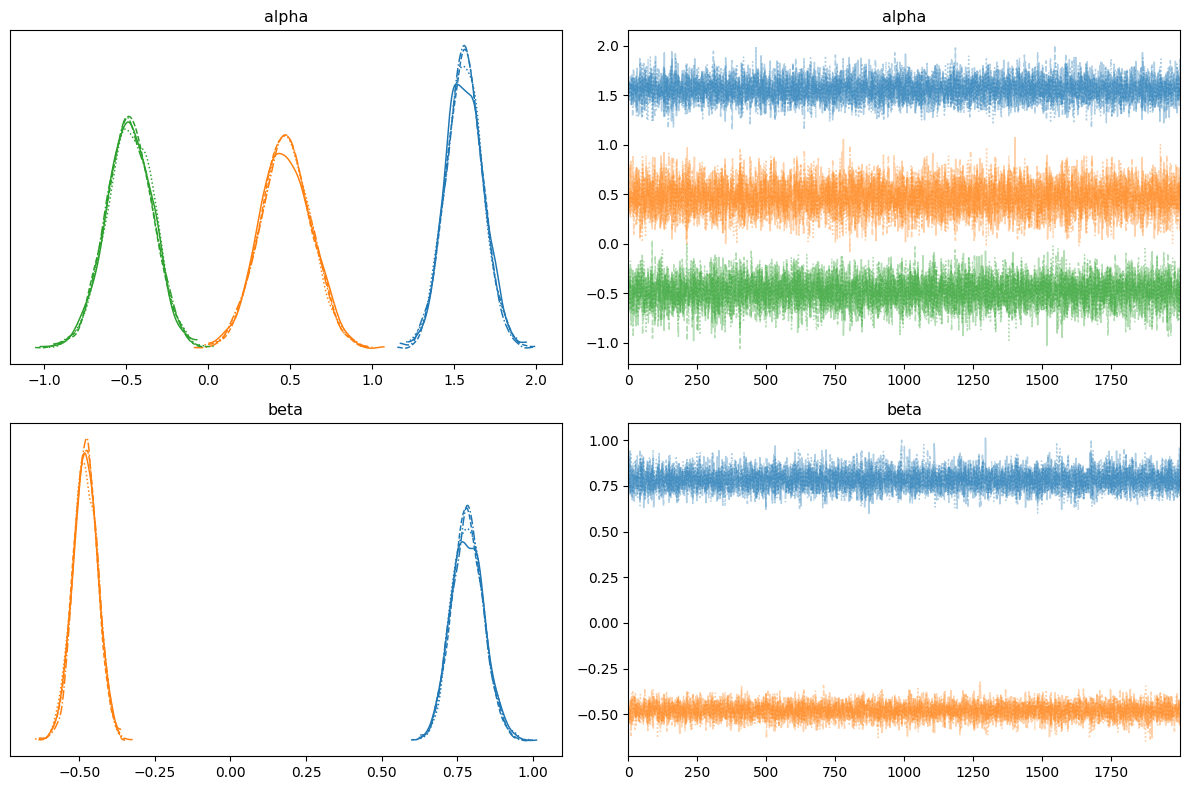

In [10]:
# トレースプロットと事後分布
az.plot_trace(idata, var_names=["alpha", "beta"], figsize=(12, 8))
plt.tight_layout()
plt.show()